#  Hierarchical Clustering

L’algorithme **Hierarchical Clustering (Classification Hiérarchique)** est une méthode **d’apprentissage non supervisé**.
Comme pour les K-Means, l'objectif est de regrouper les individus ayant des comportements similaires au regard des variables disponibles. On crée alors des classes (clusters) homogènes d'individus.

On se concentrera plus particulièrement ici à l'**Agglomerative Clustering (AC)**. Une variante, **Divise Clustering** proposée dans Python, ne sera pas étudiée. 

L'Agglomerative Clustering procède par agrégations successives de groupes d'individus. On crée à chaque itération une partition obtenue en agrégeant 2 à 2 les individus les plus proches. L’algorithme fournit une hiérarchie de partitions résumée par le **dendogramme** : arbre contenant l’historique de la classification et permettant de retrouver n-1 partitions, n étant le nombre d'individus dans la base.

<div>
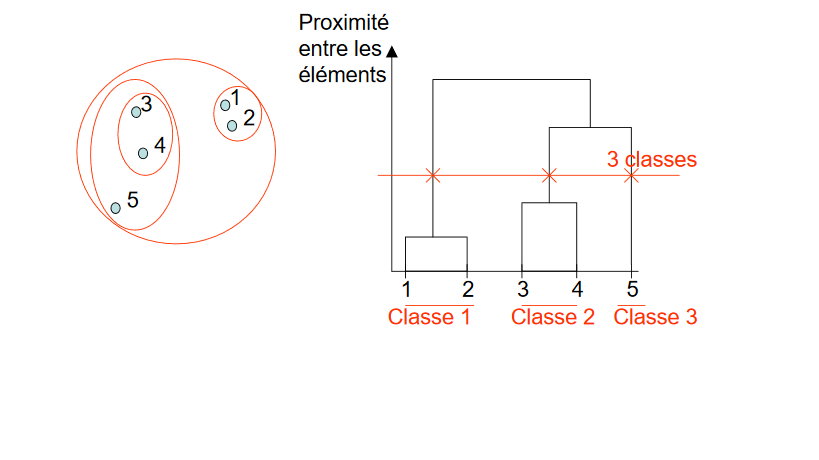
</div>
On doit choisir une métrique pour mesurer la distance entre les individus (ex: euclidienne, Manhattan,Chi2...) ainsi qu'un critère d'aggrégation pour mesurer la distance entre les éléments individuels et les groupes déjà formés (ex: critère des centres de gravité, de la distance minimale, maximale, critère de ward...)

En pratique, on privilégie le plus souvent la méthode de Ward. Cette méthode cherche à minimiser l’inertie intra-classe et à maximiser l’inertie inter-classe afin d’obtenir des classes les plus homogènes possibles. 

Le nombre de clusters retenu est défini a posteriori en étudiant le dendogramme. La hauteur de chaque palier (qui représente une agrégation) est égale à la valeur de l’indice d’agrégation entre les groupes agrégés. On repère les endroits où on observe un "saut" dans le critère d'agrégation. 

Une pratique assez fréquente est d’appliquer d’abord l’algorithme K-means avec une valeur élevée de k (mais néanmoins k≪N), ensuite d’utiliser la classification ascendante hiérarchique pour regrouper les k groupes issus de K-means.

Nous allons mettre en pratique la Classification Hiérarchique sur de dataset **FROMAGE**. 


### 1. Chargement des librairies utiles

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


### 1. Description du jeu de données

1. Charger le jeu de données (créer un index avec la 1ère colonne) et afficher ses dimensions
2. Afficher les 10 premières lignes de la table
3. Afficher la liste des variables et leurs types
4. Afficher les statistiques descriptives 


In [92]:
data = pd.read_csv('data/fromage.txt', sep='\t', index_col='Fromages')

In [93]:
data.shape

(29, 9)

In [94]:
data.head(10)

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20
Cantal,367,256.0,264.0,28.8,48.8,5.7,23.0,90,30
Chabichou,344,192.0,87.2,27.9,90.1,36.3,19.5,80,36
Chaource,292,276.0,132.9,25.4,116.4,32.5,17.8,70,25
Cheddar,406,172.0,182.3,32.5,76.4,4.9,26.0,110,28


In [95]:
data.columns

Index(['calories', 'sodium', 'calcium', 'lipides', 'retinol', 'folates',
       'proteines', 'cholesterol', 'magnesium'],
      dtype='object')

In [96]:
data.dtypes

calories         int64
sodium         float64
calcium        float64
lipides        float64
retinol        float64
folates        float64
proteines      float64
cholesterol      int64
magnesium        int64
dtype: object

In [97]:
data.describe()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,300.034483,210.086207,185.734483,24.158621,67.562069,13.010345,20.168966,74.586207,26.965517
std,91.914356,108.678923,72.528882,8.129642,24.163098,11.723339,6.959788,28.245755,11.318388
min,70.000000,22.000000,72.600000,3.400000,37.100000,1.200000,4.100000,10.000000,10.000000
25%,292.000000,140.000000,132.900000,23.400000,51.600000,4.900000,17.800000,70.000000,20.000000
50%,321.000000,223.000000,202.300000,26.300000,62.300000,6.400000,21.000000,80.000000,26.000000
75%,355.000000,276.000000,220.500000,29.100000,76.400000,21.100000,23.400000,90.000000,30.000000
max,406.000000,432.000000,334.600000,33.300000,150.500000,36.400000,35.700000,120.000000,51.000000


 ### 2. Analyse des valeurs manquantes
1. Afficher le nombre ainsi que le pourcentage de valeurs manquantes par variable

In [98]:
data.isnull().sum()

calories       0
sodium         0
calcium        0
lipides        0
retinol        0
folates        0
proteines      0
cholesterol    0
magnesium      0
dtype: int64

In [99]:
data.isnull().sum()/len(data)

calories       0.0
sodium         0.0
calcium        0.0
lipides        0.0
retinol        0.0
folates        0.0
proteines      0.0
cholesterol    0.0
magnesium      0.0
dtype: float64

 ### 3. Analyse exploratoire rapide
 1. Afficher le `pairplot` de l'ensemble des variables ainsi que la HeatMap des corrélations. Commenter des résultats

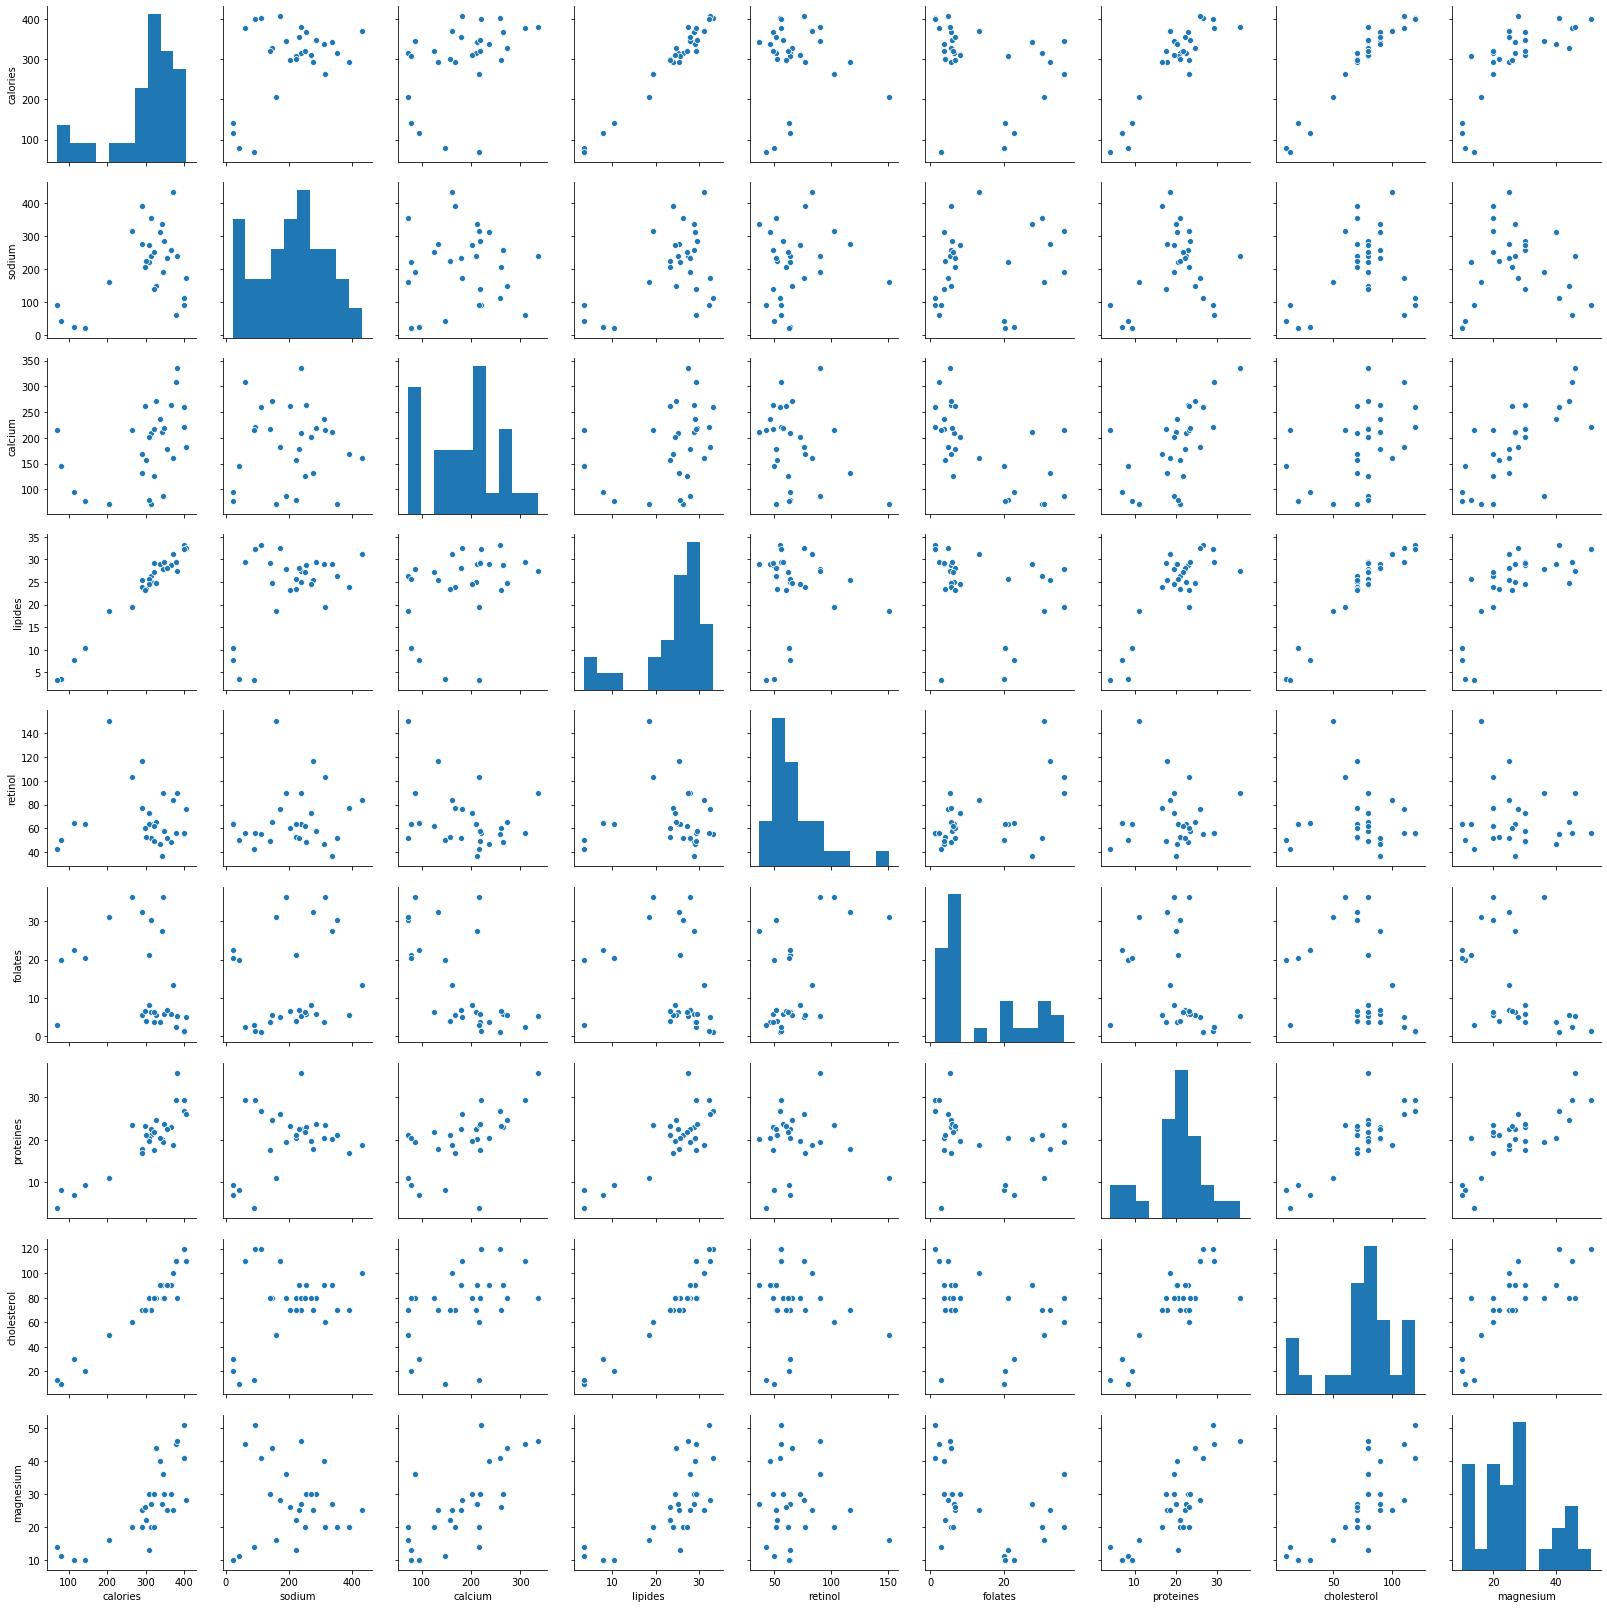

In [49]:

sns.pairplot(data)

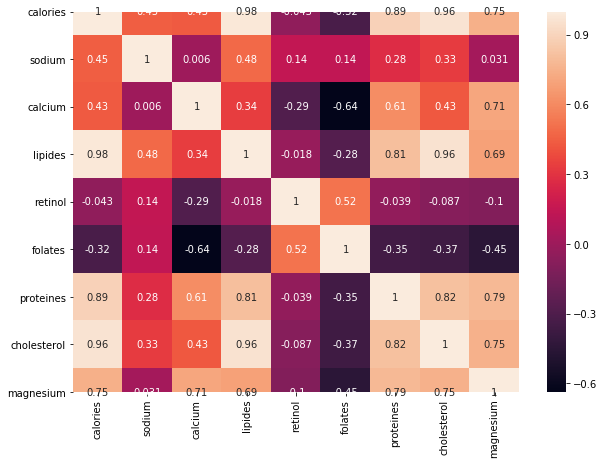

In [100]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True)

 ### 4. Modélisation 
Nous allons à cette stade entraîner un premier **modèle Agglomerative Clustering** en utilisant la librairie `scipy.cluster.hierarchy`
1. Afficher la DocString de `linkage`
2. On choisit method='ward',metric='euclidean'. Que signifie ce paramétrage?
3. Tracer le dendrogramme du modèle. Commenter. Fixer le nombre de classes à retenir 
4. Visualiser les groupes avec un code couleur pour chaque classe dans le dendrogramme
5. Lancer la fonction `sklearn.cluster.AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')`
6. Créer un DataFrame avec les données de départ et en dernière colonne le numéro de cluster associé à chaque fromage
7. Décrire chaque cluster par la moyenne de chacune des variables

**Bonus :** Lancer les K-means et comparer les clusters obtenus entre les 2 méthodes.Comparer les indices de Calinski-Harabasz des deux méthodes 

In [101]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [102]:
#Afficher la DocString de linkage
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1d condensed distance matrix
    or a 2d array of observation vectors.
    
    If y is a 1d condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the n

In [103]:
#Ward method : utilise l'algorithme de minimisation de Ward (ne marche qu'avec la dist euclidienne)
#Euclidean metric : utilise la distance euclidienne entre les points
l_from = linkage(data, method='ward',metric='euclidean')
l_from

array([[ 16.        ,  20.        ,  33.64119498,   2.        ],
       [ 17.        ,  18.        ,  37.47452468,   2.        ],
       [  1.        ,  23.        ,  38.02841043,   2.        ],
       [  2.        ,   9.        ,  45.00877692,   2.        ],
       [ 21.        ,  26.        ,  49.66356814,   2.        ],
       [  3.        ,  30.        ,  58.4642911 ,   3.        ],
       [ 11.        ,  27.        ,  59.83895053,   2.        ],
       [  6.        ,  10.        ,  61.06209954,   2.        ],
       [ 22.        ,  31.        ,  70.17045912,   3.        ],
       [ 25.        ,  35.        ,  80.84746955,   3.        ],
       [  5.        ,  19.        ,  87.48159806,   2.        ],
       [ 15.        ,  28.        ,  88.28833445,   2.        ],
       [  7.        ,  33.        ,  90.54197921,   3.        ],
       [ 14.        ,  24.        ,  94.70348462,   2.        ],
       [ 12.        ,  32.        ,  96.77015725,   3.        ],
       [ 37.        ,  41

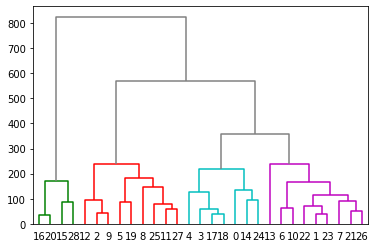

In [104]:
dn = dendrogram(l_from, leaf_rotation=0, color_threshold=240, above_threshold_color='grey')

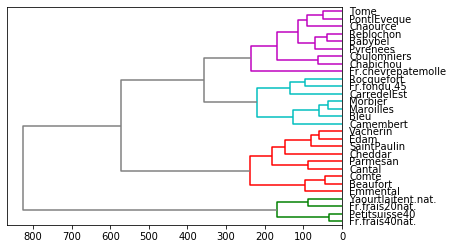

In [105]:
dn = dendrogram(l_from, labels=data.index, leaf_rotation=0, orientation="left", color_threshold=240, above_threshold_color='grey')

In [106]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
ac.fit(data)

ac.labels_

array([1, 2, 0, 1, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 1, 3, 3, 1, 1, 0, 3, 2,
       2, 2, 1, 0, 2, 0, 3], dtype=int64)

In [107]:
data_ac = data.copy()
data_ac['Labels'] = ac.labels_

In [108]:
data_ac.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium,Labels
Fromages,,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20,1
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27,2
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41,0
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27,1
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20,1


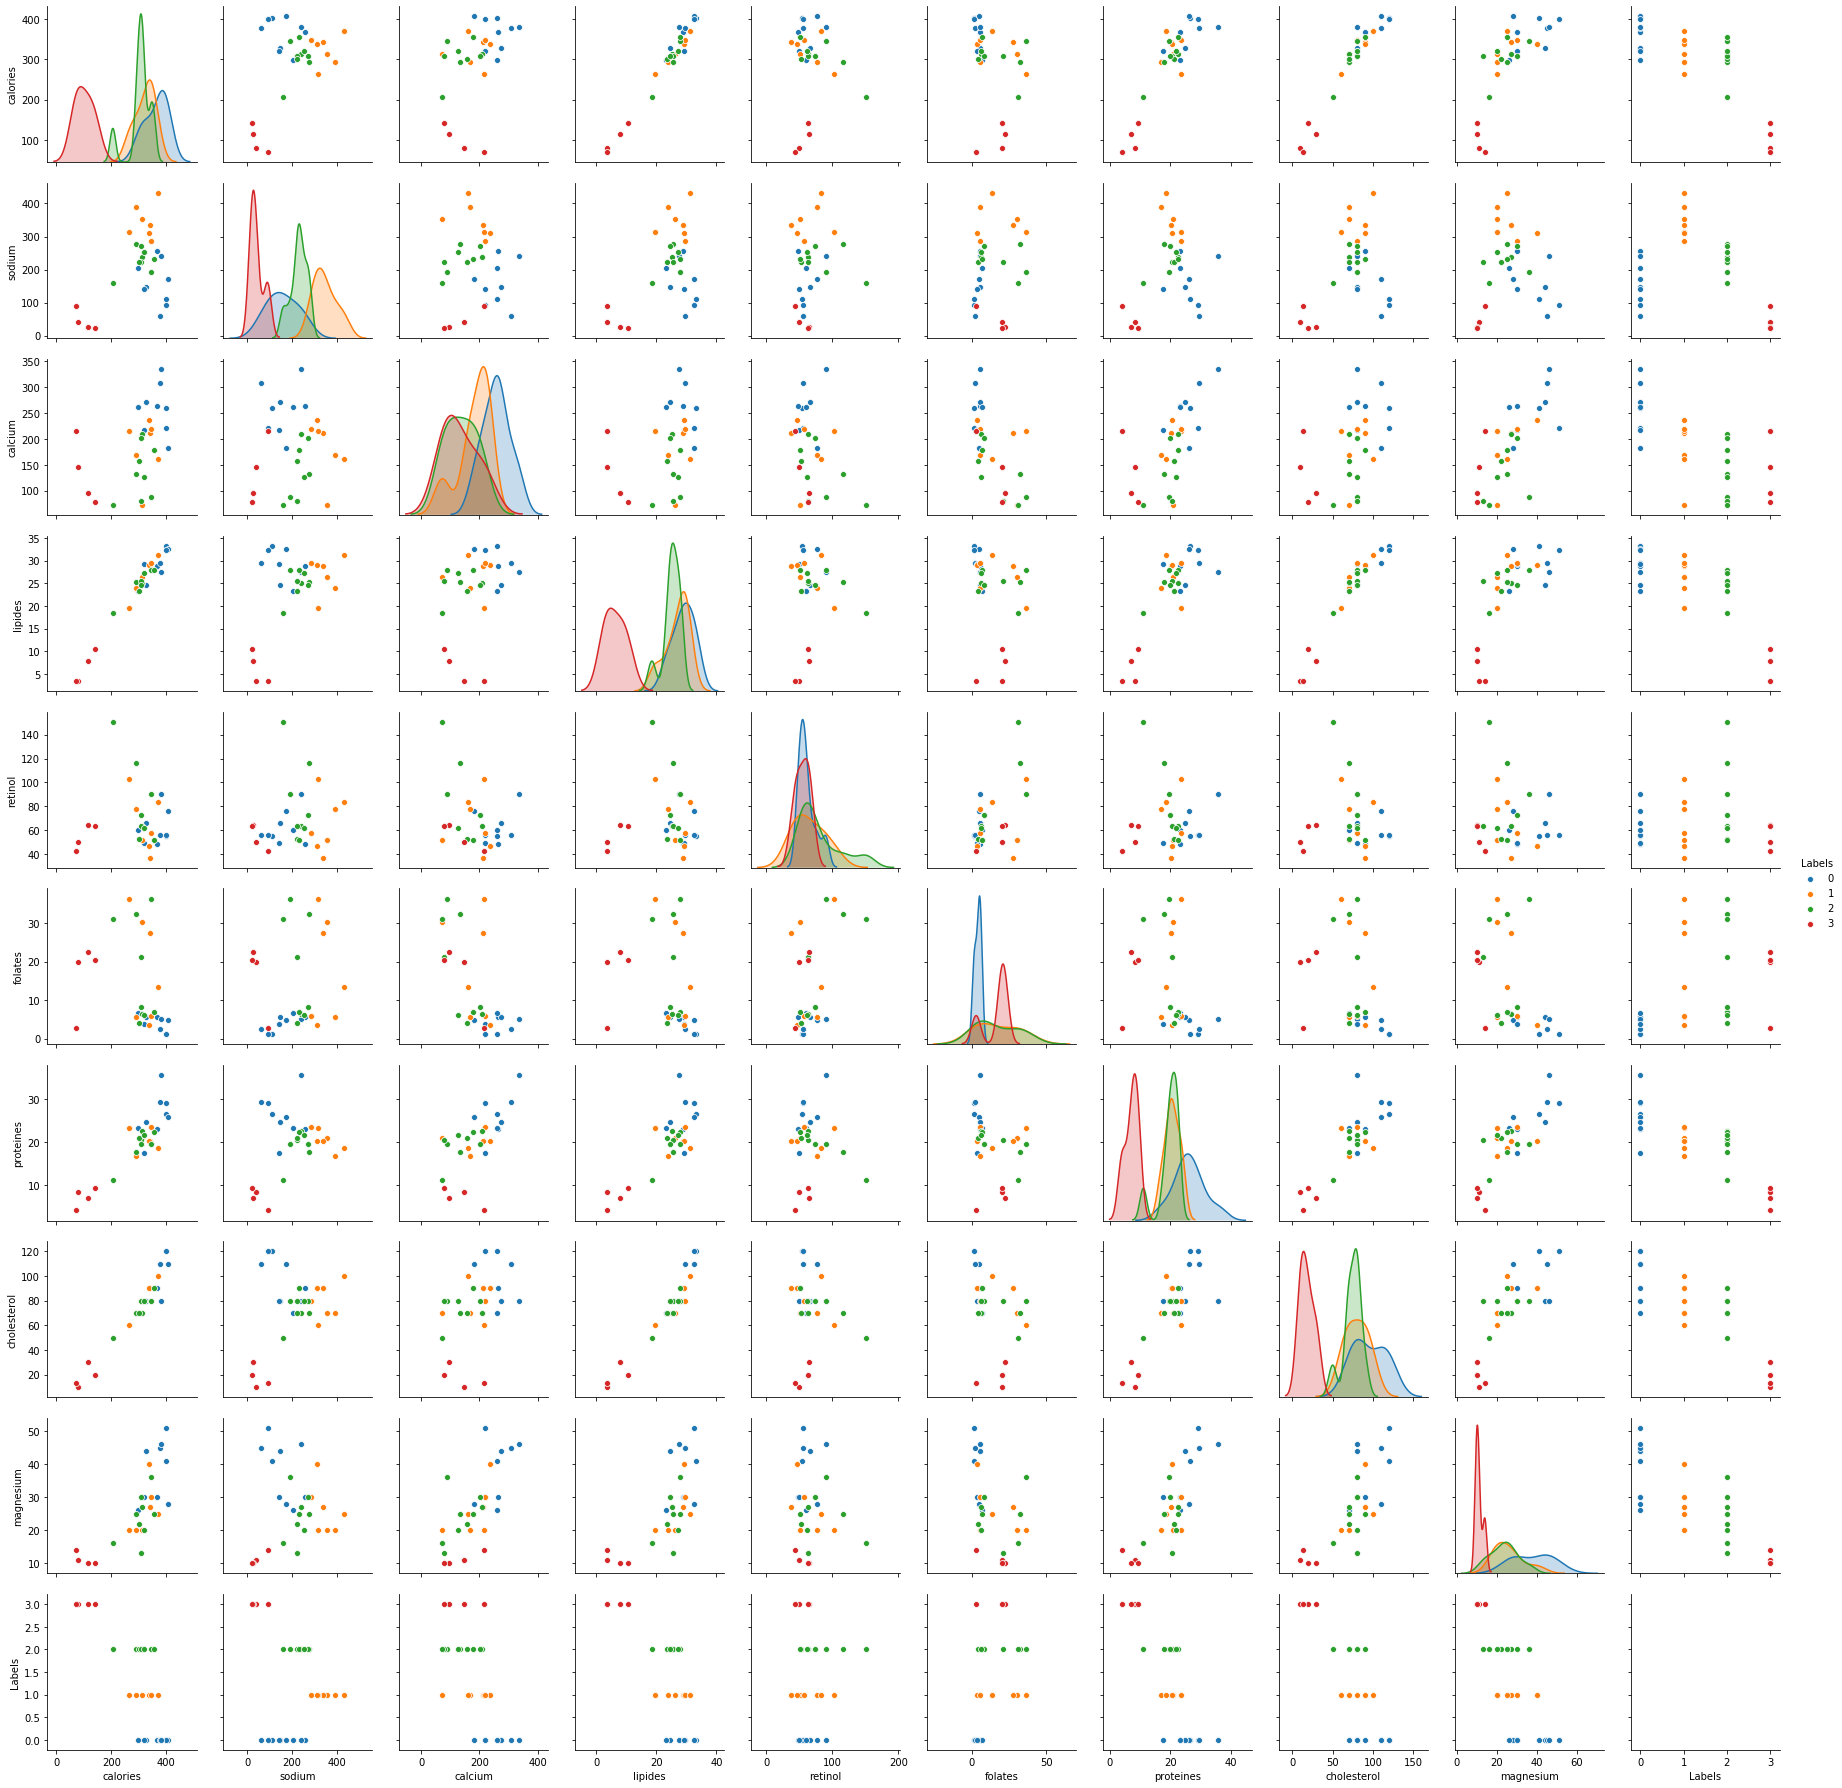

In [113]:
sns.pairplot(data_ac, hue="Labels")

In [114]:
data_ac.groupby('Labels').mean()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Labels,,,,,,,,,
0,364.222222,158.333333,257.800000,29.022222,61.955556,4.066667,26.166667,95.555556,37.888889
1,323.857143,345.928571,183.685714,26.928571,65.271429,17.485714,20.585714,80.000000,26.000000
2,305.444444,229.666667,138.366667,25.088889,80.466667,16.933333,19.611111,74.444444,23.777778
3,101.750000,44.750000,133.750000,6.275000,55.150000,16.475000,7.200000,18.250000,11.250000


In [117]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(data)
df_kmeans = data.copy()
df_kmeans['Labels'] = kmeans.labels_

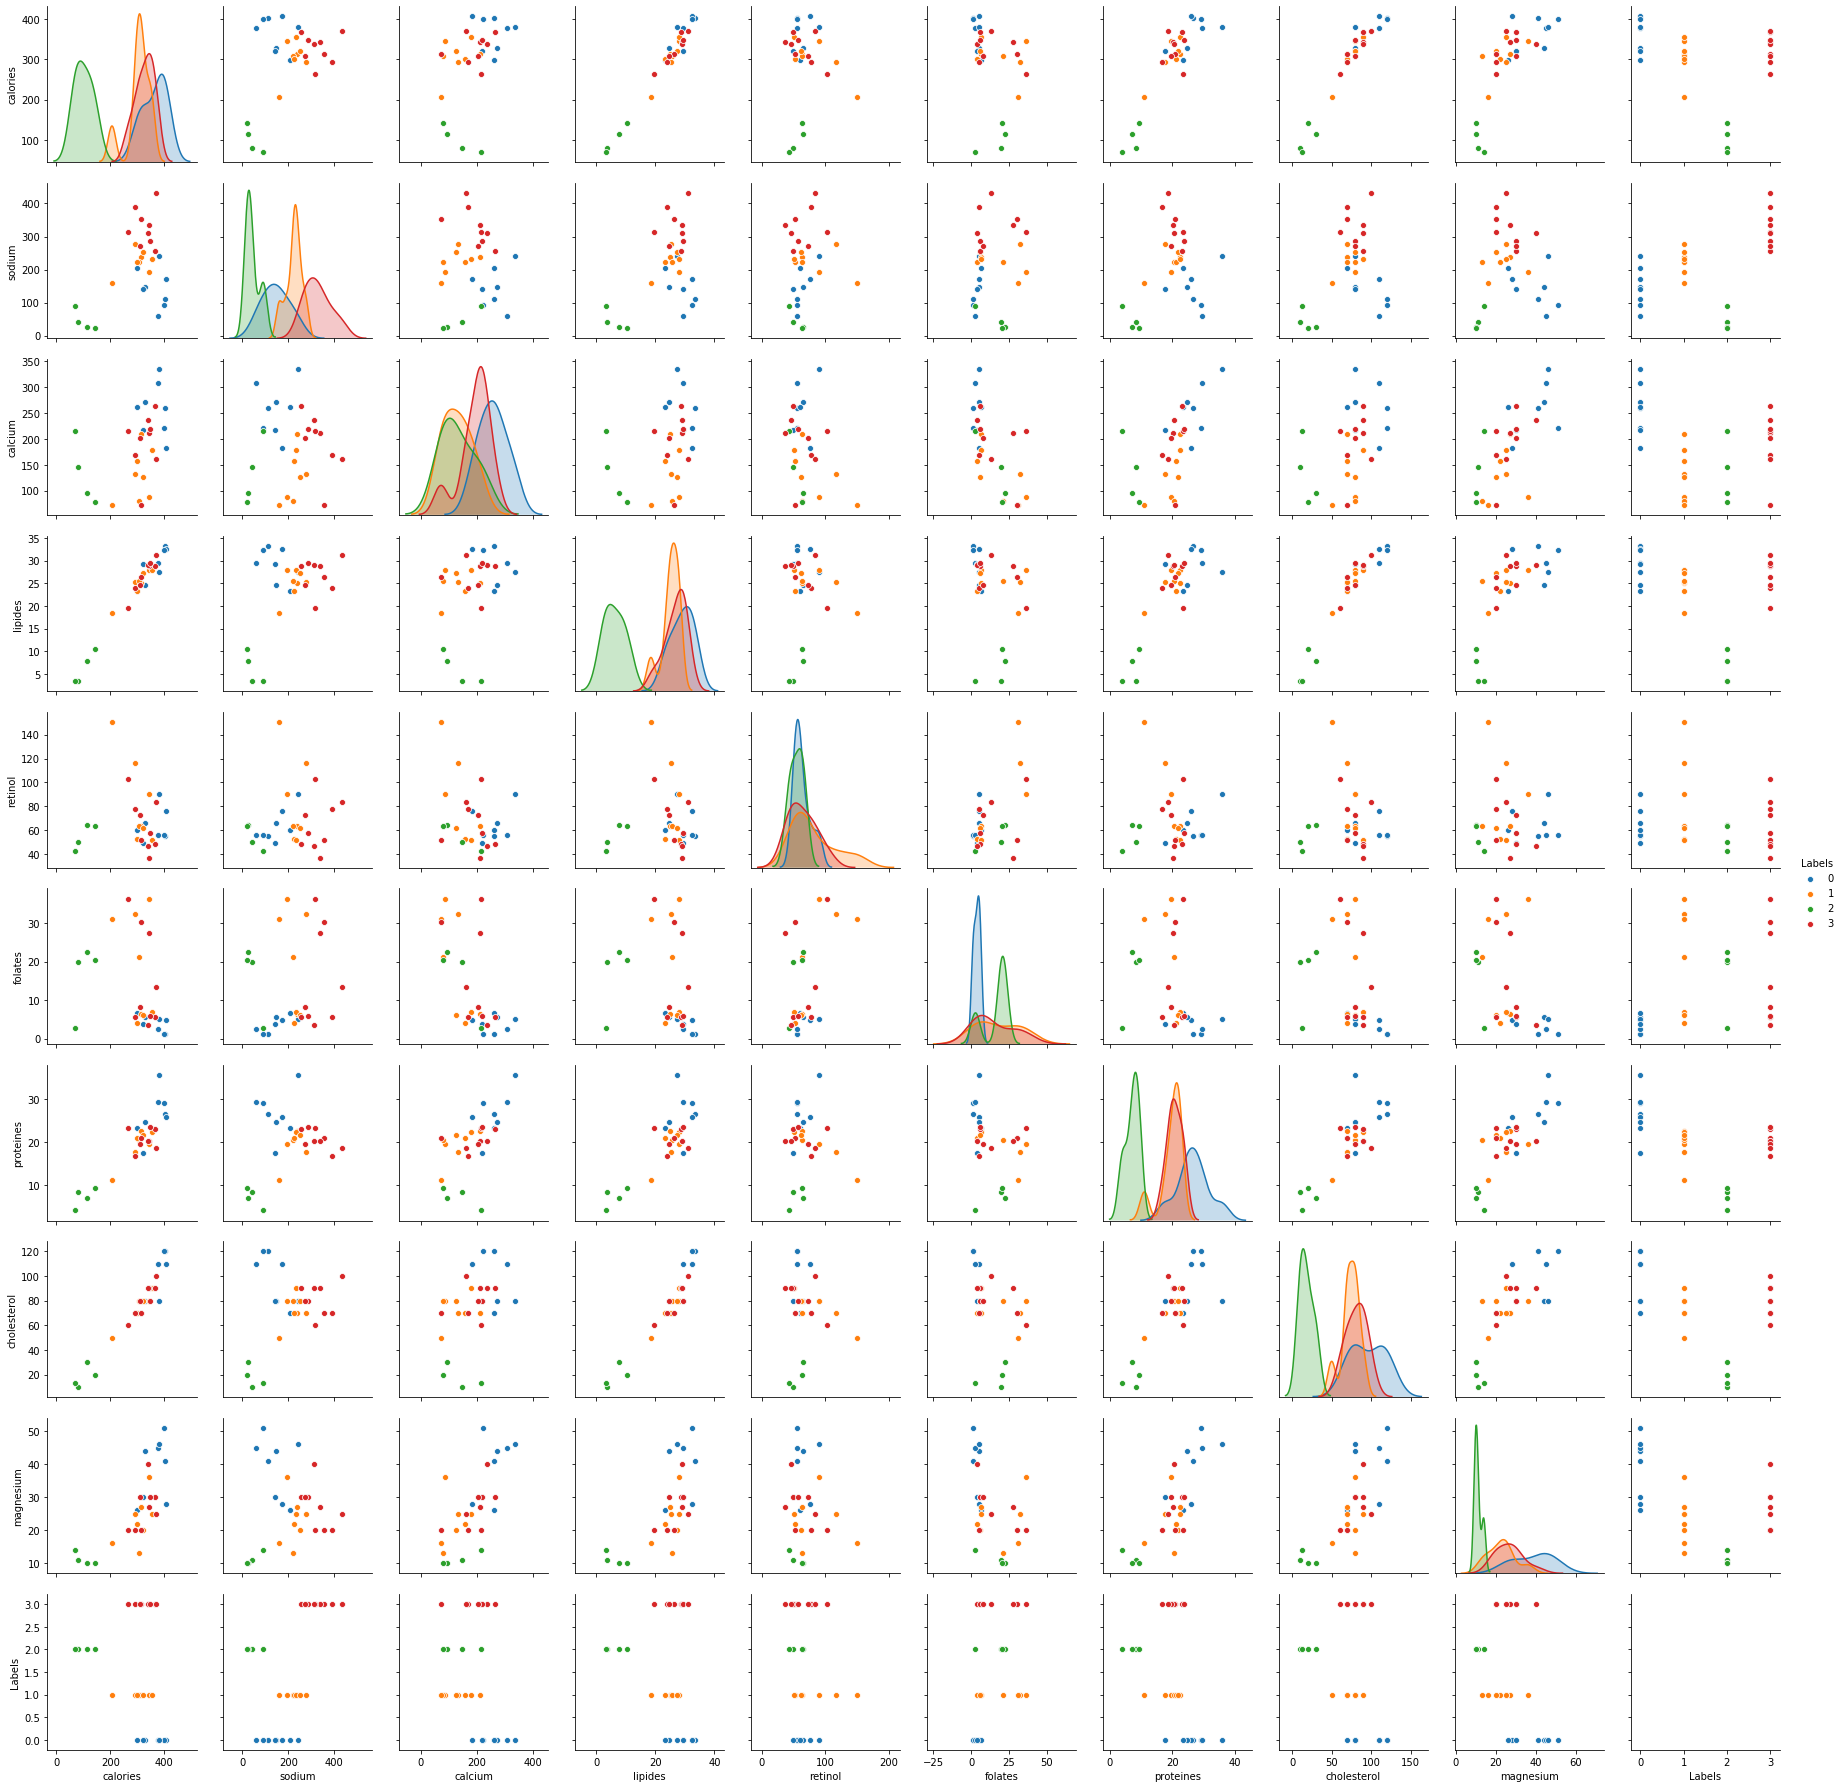

In [119]:
sns.pairplot(df_kmeans, hue="Labels")

In [120]:
from sklearn.metrics import calinski_harabasz_score

chs_ac = calinski_harabasz_score(data, ac.labels_)
chs_kmeans = calinski_harabasz_score(data, kmeans.labels_)

print(chs_ac, chs_kmeans)

24.078339411458696 23.922402241218652
